# Data Analysis  for the paper 'Scrum RPG'
## To be published at JENUI2024
### By José Antonio Parejo Maestre japarejo@us.es

## Analysis of the Student´s satisfaction survey

### Data import 

Prior to any other data analysis, the files have been anonymized, removing any column that could provide information about the authors of the responses, and substituting them by an integer identifier.
The data of the surveys is provided  in X different files: 
 * Formulario Scrum RPG (Responses) - Form Responses 1: Which contains the data corresponding to the survey regarding Scrum RPG in the course 2022-2023

The files are provided in csv format  (with extension .csv), thus we use pandas to import  them. 
Additionally, we use  the packages 'plot_likert' and 'matplotlib' to generate charts.

In [39]:
import pandas as pd
import plot_likert as pl
import matplotlib.pyplot as plt


#===================#
#    DATA IMPORT    #
#===================#
df = pd.read_csv("data/Formulario Scrum RPG (Responses) - Form Responses 1.csv")
display(df)


,Timestamp,Introduzca su UVUS,¿Cuánto considera que ha aprendido utilizando nuestro producto?,¿Considera que nuestro producto es útil para la introducción a Scrum?,¿Le gustaría ver este tipo de herramientas en otras asignaturas?,Indique cómo de correlacionado ve esta herramienta con la asignatura PSG2,¿Le ha ayudado esta herramienta a entender mejor algunos conceptos de PSG2?,¿Qué le ha parecido el juego?,¿Cómo valoraría la interfaz de usuario?,¿Cómo de bien cree que ha entendido las mecánicas del juego?,Indique cómo de difícil le ha parecido el juego,Feedback relativo a la interfaz de usuario,Feedback relativo a las mecánicas del juego,Feedback relativo a la complejidad del juego,Feedback relativo al aprendizaje que ofrece el juego,¿Algo más que quiera decir?
0,2/8/2023 13:27:20,adrgarpor,Algo,Sí,Sí,Tienen bastante relación,Sí,Aburrido,2,2,3,"Está claro que al ser un juego educativo, debe...",Si bien en un Daily Scrum no deberíamos titube...,NaN,"Bajo mi punto de vista, más que aprendizaje, o...",Considero un error la falta de multi-idioma. E...
1,2/4/2023 14:22:08,adrromflo,Algo,Sí,Sí,Tienen bastante relación,No,Algo entrenetido,2,3,2,NaN,NaN,NaN,NaN,NaN
2,2/6/2023 18:35:30,aitroddue,Bastante,Sí,Sí,Tienen bastante relación,Sí,Ha sido divertido,2,4,3,La interfaz al inicio es algo compleja y duran...,Las mecánicas en general están bien y se entie...,La única queja es que en la selección de dific...,Se comprende mejor la necesidad del cambio de ...,Me ha gustado que se introduzcan conceptos de ...
3,2/8/2023 1:50:14,alecamgal1,Algo,Sí,Sí,Tienen bastante relación,Sí,Algo entrenetido,4,5,1,Creo que es necesario que aparezca el nombre d...,NaN,NaN,NaN,NaN
4,2/3/2023 18:10:21,alecorgon1,Bastante,Sí,Sí,Es ideal para la asignatura,Sí,Estaba bien,3,4,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2/5/2023 18:15:38,tadcabgom,Nada,No,No,Tienen alguna temática común,No,Aburrido,1,1,3,"Muy pobre, los texto se solapan y en pantallas...","Bastante aburrido, por lo menos en mi opinión,...",Muy difícil de entender al principio. Los tuto...,No creo que alguien que no sepa scrum lo apren...,No
81,2/4/2023 20:32:42,ursgarsan,Algo,No sé,Sí,Tienen alguna temática común,Sí,Algo entrenetido,2,1,3,NaN,NaN,NaN,NaN,NaN
82,2/6/2023 15:40:22,vicmorcon,Algo,No,No,Tienen bastante relación,No,Aburrido,2,2,2,"Algunos elementos de la UI, como el campo de t...",Estaría bien que los enemigos (las tareas) tuv...,Podrían asignarse automáticamente tareas al pr...,NaN,La aplicación me ha crasheado varias veces en ...
83,2/4/2023 18:22:03,vicruidel1,Bastante,Sí,Sí,Tienen bastante relación,Sí,Ha sido divertido,3,5,3,Muy intuitiva,Fácil de entender y de jugar,NaN,Ofrece un gran aprendizaje sobre Scrum y ayuda...,NaN


## Data Wrangling
Next we modify the structure of the data-frames, since office 365 introduces some spureous columns, and some of the columns names are not appropirate for data analysis and reporting.
Additionally, we fix some minor typos present in the response values of the second survey (2022).
First, we remove the spureous columns created by Microsoft Office Forms 365, and show the set of remaining columns in each dataset.

In [40]:
#=======================#
#    DATA WRANGLING     #
#=======================#
#------------------------#
#    COLUMN REMOVAL      #
#------------------------#
columnsToRemove=['Timestamp']
df=df.drop(columns=columnsToRemove,errors='ignore')
print("Remaining columns in the dataset")
print(df.columns)


Remaining columns in the dataset
Index(['Introduzca su UVUS',
       '¿Cuánto considera que ha aprendido utilizando nuestro producto?',
       '¿Considera que nuestro producto es útil para la introducción a Scrum?',
       '¿Le gustaría ver este tipo de herramientas en otras asignaturas?',
       'Indique cómo de correlacionado ve esta herramienta con la asignatura PSG2',
       '¿Le ha ayudado esta herramienta a entender mejor algunos conceptos de PSG2?',
       '¿Qué le ha parecido el juego?',
       '¿Cómo valoraría la interfaz de usuario?',
       '¿Cómo de bien cree que ha entendido las mecánicas del juego?',
       'Indique cómo de difícil le ha parecido el juego',
       'Feedback relativo a la interfaz de usuario',
       'Feedback relativo a las mecánicas del juego',
       'Feedback relativo a la complejidad del juego',
       'Feedback relativo al aprendizaje que ofrece el juego',
       '¿Algo más que quiera decir?'],
      dtype='object')


Second, we rename and homogeinize the names of the columns in both datasets. Unfortunately, Microsoft Office Forms 365 does not respect the name of the question for the corresponding column of the dataset in most cases, thus we have to rename and homogeinize the names of the columns in both datasets. Apart, from such renaming, we check the columns with duplicated names in order to avoid inconsistences.

In [41]:
import collections
#------------------------#
#    COLUMN RENAMIG      #
#------------------------#
columnsToRename={'¿Considera que nuestro producto es útil para la introducción a Scrum?':'¿Considera que nuestro juego es útil para la introducción a Scrum?',
                '¿Cómo valoraría la interfaz de usuario?': 'Interfaz de Usuario',
                 '¿Cómo de bien cree que ha entendido las mecánicas del juego?':'Mecánicas de juego',
                 'Indique cómo de difícil le ha parecido el juego':'Dificultad',
                 'Introduzca su UVUS':'id'}

print("Columns prior to the renaming of the dataset:")
print(df.columns)
print("Duplicated column names in the dataset:")
print([item for item, count in collections.Counter(df.columns).items() if count > 1])
print("--------------------------------------------")
df=df.rename(columns=columnsToRename)
print("Columns after the renaming the dataset:")
print(df.columns)
print("Duplicated column names in the  dataset:")
print([item for item, count in collections.Counter(df.columns).items() if count > 1])

Columns prior to the renaming of the dataset:
Index(['Introduzca su UVUS',
       '¿Cuánto considera que ha aprendido utilizando nuestro producto?',
       '¿Considera que nuestro producto es útil para la introducción a Scrum?',
       '¿Le gustaría ver este tipo de herramientas en otras asignaturas?',
       'Indique cómo de correlacionado ve esta herramienta con la asignatura PSG2',
       '¿Le ha ayudado esta herramienta a entender mejor algunos conceptos de PSG2?',
       '¿Qué le ha parecido el juego?',
       '¿Cómo valoraría la interfaz de usuario?',
       '¿Cómo de bien cree que ha entendido las mecánicas del juego?',
       'Indique cómo de difícil le ha parecido el juego',
       'Feedback relativo a la interfaz de usuario',
       'Feedback relativo a las mecánicas del juego',
       'Feedback relativo a la complejidad del juego',
       'Feedback relativo al aprendizaje que ofrece el juego',
       '¿Algo más que quiera decir?'],
      dtype='object')
Duplicated column nam

We swap the order of some  columns  in order to get a consistent merged dataset.

In [42]:
#------------------------#
#    COLUMN SWAPPING     #
#------------------------#
columnsToSwap={}

#define function to swap columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

for x in columnsToSwap:
    print(x)
    print(columnsToSwap[x])
    df=swap_columns(df,x,columnsToSwap2021[x])

Finally, we fix some minor typos in the survey

In [43]:
#---------------------------------------#
#    TYPOS FIXING & CONCATENATION       #
#---------------------------------------#
# We fix some minor typos in the survey of 2022
#df2022=df2022.replace([' Muy insatisfecho/a'], 'Muy insatisfecho/a')
#df=pd.concat([df2021,df2022],ignore_index=True);
df

,id,¿Cuánto considera que ha aprendido utilizando nuestro producto?,¿Considera que nuestro juego es útil para la introducción a Scrum?,¿Le gustaría ver este tipo de herramientas en otras asignaturas?,Indique cómo de correlacionado ve esta herramienta con la asignatura PSG2,¿Le ha ayudado esta herramienta a entender mejor algunos conceptos de PSG2?,¿Qué le ha parecido el juego?,Interfaz de Usuario,Mecánicas de juego,Dificultad,Feedback relativo a la interfaz de usuario,Feedback relativo a las mecánicas del juego,Feedback relativo a la complejidad del juego,Feedback relativo al aprendizaje que ofrece el juego,¿Algo más que quiera decir?
0,adrgarpor,Algo,Sí,Sí,Tienen bastante relación,Sí,Aburrido,2,2,3,"Está claro que al ser un juego educativo, debe...",Si bien en un Daily Scrum no deberíamos titube...,NaN,"Bajo mi punto de vista, más que aprendizaje, o...",Considero un error la falta de multi-idioma. E...
1,adrromflo,Algo,Sí,Sí,Tienen bastante relación,No,Algo entrenetido,2,3,2,NaN,NaN,NaN,NaN,NaN
2,aitroddue,Bastante,Sí,Sí,Tienen bastante relación,Sí,Ha sido divertido,2,4,3,La interfaz al inicio es algo compleja y duran...,Las mecánicas en general están bien y se entie...,La única queja es que en la selección de dific...,Se comprende mejor la necesidad del cambio de ...,Me ha gustado que se introduzcan conceptos de ...
3,alecamgal1,Algo,Sí,Sí,Tienen bastante relación,Sí,Algo entrenetido,4,5,1,Creo que es necesario que aparezca el nombre d...,NaN,NaN,NaN,NaN
4,alecorgon1,Bastante,Sí,Sí,Es ideal para la asignatura,Sí,Estaba bien,3,4,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,tadcabgom,Nada,No,No,Tienen alguna temática común,No,Aburrido,1,1,3,"Muy pobre, los texto se solapan y en pantallas...","Bastante aburrido, por lo menos en mi opinión,...",Muy difícil de entender al principio. Los tuto...,No creo que alguien que no sepa scrum lo apren...,No
81,ursgarsan,Algo,No sé,Sí,Tienen alguna temática común,Sí,Algo entrenetido,2,1,3,NaN,NaN,NaN,NaN,NaN
82,vicmorcon,Algo,No,No,Tienen bastante relación,No,Aburrido,2,2,2,"Algunos elementos de la UI, como el campo de t...",Estaría bien que los enemigos (las tareas) tuv...,Podrían asignarse automáticamente tareas al pr...,NaN,La aplicación me ha crasheado varias veces en ...
83,vicruidel1,Bastante,Sí,Sí,Tienen bastante relación,Sí,Ha sido divertido,3,5,3,Muy intuitiva,Fácil de entender y de jugar,NaN,Ofrece un gran aprendizaje sobre Scrum y ayuda...,NaN


### Figures generation

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


<AxesSubplot: xlabel='Porcentaje de respuestas'>

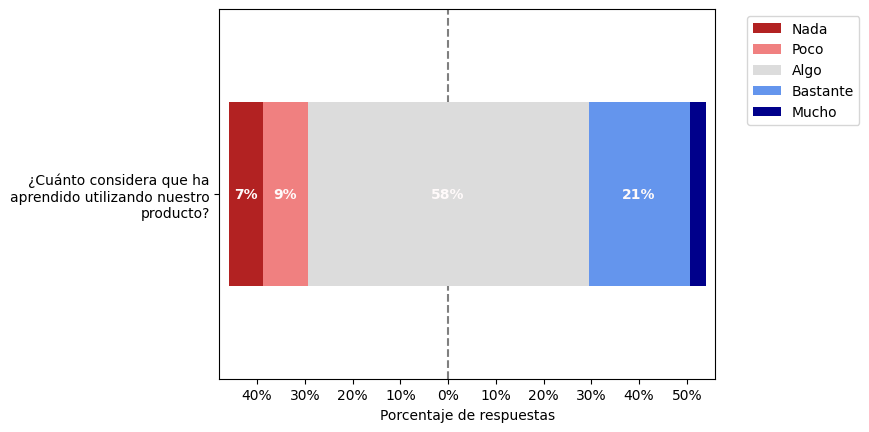

In [44]:
#================================#
#    LIKERT TEACHING ANALYSIS    #
#================================#
myscale = \
    ['Nada',
     'Poco',
     'Algo',
     'Bastante',
     'Mucho'
     ]
columns=[1]
myplot=pl.plot_likert(df[[
    '¿Cuánto considera que ha aprendido utilizando nuestro producto?'     
]], myscale, plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myplot.xaxis.set_label_text('Porcentaje de respuestas')
myplot.get_figure().savefig('figs/CuantoConsideraQueHaAprendido.png',bbox_inches='tight',dpi=300)
myplot

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


<AxesSubplot: xlabel='Porcentaje de respuestas'>

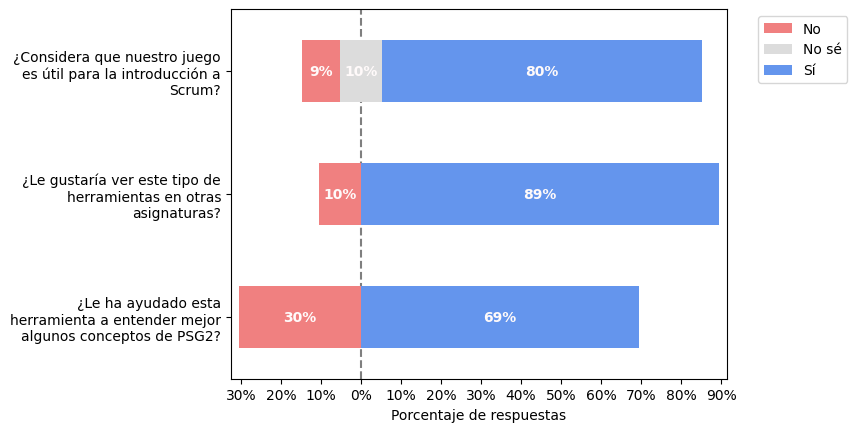

In [45]:
myscale = \
    ['','No',     
     'No sé',
     'Sí',''
     ]
columns=[1]
myplot=pl.plot_likert(df[[
    '¿Considera que nuestro juego es útil para la introducción a Scrum?',     
    '¿Le gustaría ver este tipo de herramientas en otras asignaturas?',
    '¿Le ha ayudado esta herramienta a entender mejor algunos conceptos de PSG2?'
]], myscale, plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myplot.xaxis.set_label_text('Porcentaje de respuestas')
myplot.get_figure().savefig('figs/UtilidadDelJuego.png',bbox_inches='tight',dpi=300)
myplot

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


<AxesSubplot: xlabel='Porcentaje de respuestas'>

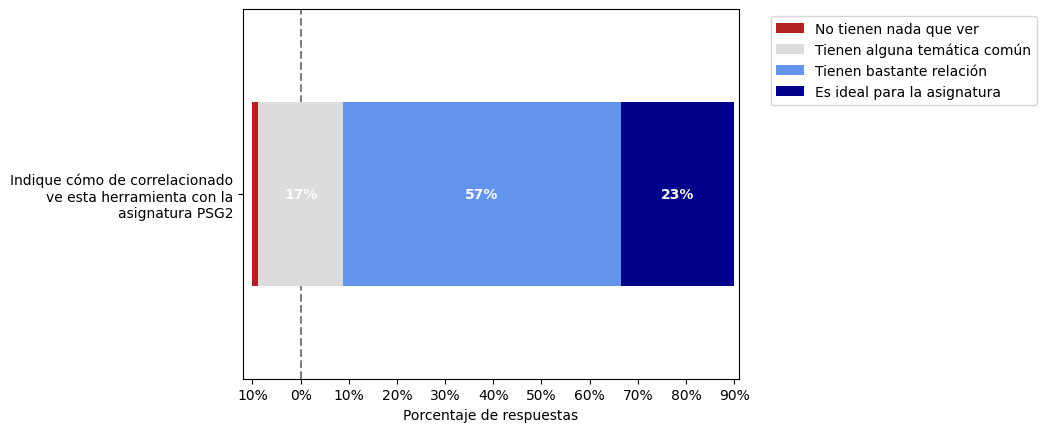

In [46]:
# Relación en escala de likert:
satisfaction_scale = \
    ['No tienen nada que ver',
     '',
     'Tienen alguna temática común',
     'Tienen bastante relación',
     'Es ideal para la asignatura']
myplot=pl.plot_likert(df[[ 
    'Indique cómo de correlacionado ve esta herramienta con la asignatura PSG2'
]], satisfaction_scale, plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myplot.xaxis.set_label_text('Porcentaje de respuestas')
myplot.get_figure().savefig('figs/OpinionParaLaAsignatura.png',bbox_inches='tight',dpi=300);
myplot

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


<AxesSubplot: xlabel='Porcentaje de respuestas'>

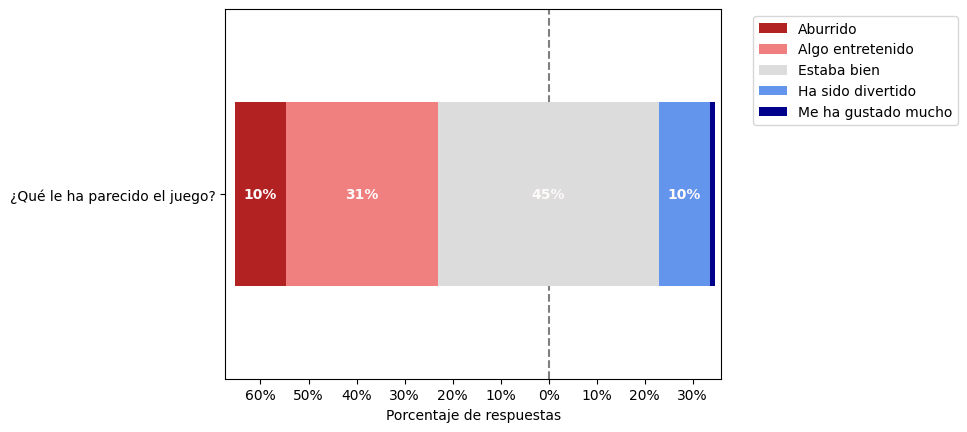

In [47]:
# Niveles de diversión en escala de likert:
fun_scale = \
    ['Aburrido',
     'Algo entretenido',
     'Estaba bien',
     'Ha sido divertido',
     'Me ha gustado mucho']
#df.replace(df['¿Qué le ha parecido el juego?'].unique()[2],'Algo entretenido',inplace=True)

df['¿Qué le ha parecido el juego?'] = df['¿Qué le ha parecido el juego?'].str.replace('entrenetido','entretenido')
myplot=pl.plot_likert(df[[                          
                         '¿Qué le ha parecido el juego?'
                         ]], 
                      fun_scale, 
                      plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myplot.xaxis.set_label_text('Porcentaje de respuestas')
myplot.get_figure().savefig('figs/DiversionLikert.png',bbox_inches='tight',dpi=300);
myplot

([<matplotlib.patches.Wedge at 0x2c2be8d2610>,
 [Text(0.14189912977260627, 1.0908091661559218, 'Estaba bien'),
  Text(-0.8129097722102662, -0.7410652483047991, 'Algo entretenido'),
  Text(0.5263628103269697, -0.965889326944187, 'Aburrido'),
  Text(1.0103357254071645, -0.4349962321284849, 'Ha sido divertido'),
  Text(1.099248770171403, -0.04064654077111507, 'Me ha gustado mucho')],
 [Text(0.0773995253305125, 0.5949868179032299, '45.9%'),
  Text(-0.44340533029650875, -0.404217408166254, '31.8%'),
  Text(0.2871069874510744, -0.5268487237877383, '10.6%'),
  Text(0.5510922138584533, -0.23727067207008265, '10.6%'),
  Text(0.5995902382753107, -0.022170840420608216, '1.2%')])

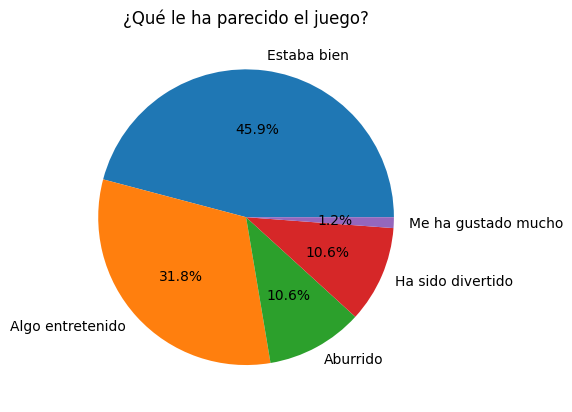

In [48]:
values=df['¿Qué le ha parecido el juego?'].value_counts()
values
plt.title('¿Qué le ha parecido el juego?')
myplot=plt.pie(values,labels=values.index.tolist(),autopct= '%1.1f%%')
plt.savefig('figs/DiversionPieChart.png')
myplot

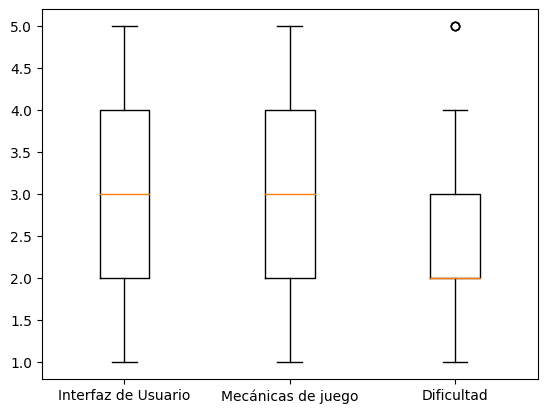

In [49]:
# Valoración técnica del juego
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.boxplot(df[['Interfaz de Usuario',
'Mecánicas de juego', 
'Dificultad']], labels=['Interfaz de Usuario',
'Mecánicas de juego', 
'Dificultad'])
plt.savefig('figs/EvaluacionJuegoBoxplot.png')
plt.show()


In [50]:
from wordcloud import WordCloud
import numpy as np
import csv
# TODO: Preparar las nubes de palabras y hace el análisis de las respuestas que consideremos más relevantes.
#suggestions=df["Exprese cualquier sugerencia, crítica, o comentario que desee que tengamos en cuenta respecto del proyecto de arquitectura."].replace('', np.nan).dropna()
#stopwords = ["o","a","e","y","de","en","que","el","al","lo","los","la","las","mi","me","en","muy","cómo","como","para","por","del","un","una","se","es","con","pero","además","Además","También","ya"]
#text = " ".join(suggestions)
#wordcloud = WordCloud(collocations = True, background_color="white", stopwords=stopwords).generate(text)
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.savefig('figs/WordCloud.png',bbox_inches='tight',dpi=300)
#plt.show()

## Analysis of the marks of the courses 2022-2023 and 2021-2022

Next we analyze the marks of the students during the course prior to the application of the new methodology and the course where the new methodology was applied.

### Data loading
We load two csv files with the marks obtained by the students in each course.

In [71]:
marks2022 = pd.read_csv("data/marks2022.csv")
marks2022["year"]=2023
marks2022 = marks2022.dropna()
display(marks2022)

marks2023 = pd.read_csv("data/marks2023.csv")
marks2023["year"]=2023
marks2023 = marks2023.dropna()
display(marks2023)


,id,mark,year
0,josaguben,0.20,2023
1,juaalvcam,0.16,2023
2,pabalvcar,0.30,2023
3,domanialv,0.30,2023
4,josariexp,0.23,2023
...,...,...,...
176,gabvidtev,0.16,2023
177,fravilpav,0.09,2023
178,migybaman,0.13,2023
179,davzamfer,0.30,2023


,id,mark,year
0,mohabu2,0.23,2023
1,seraguoro,0.30,2023
2,patagurom1,0.15,2023
3,samalbort,0.18,2023
4,pabalcber,0.23,2023
...,...,...,...
171,ignwarmur,0.23,2023
172,jeszamgue,0.16,2023
173,marzamzap,0.30,2023
174,davzarort,0.09,2023


In [77]:
df['id']=df['id'].astype(str)
marks2023["id"]=marks2023["id"].astype(str)

marks2023UsingTheTool =marks2023[marks2023['id'].isin(df["id"])]
display(marks2023UsingTheTool)

,id,mark,year
5,josalcsan1,0.25,2023
8,danarrarr,0.23,2023
9,ignarrman,0.23,2023
11,manbarjim2,0.09,2023
12,ismbargar,0.16,2023
...,...,...,...
169,marvicmar,0.30,2023
170,fravilpae,0.30,2023
172,jeszamgue,0.16,2023
173,marzamzap,0.30,2023


### Marks Figures generation

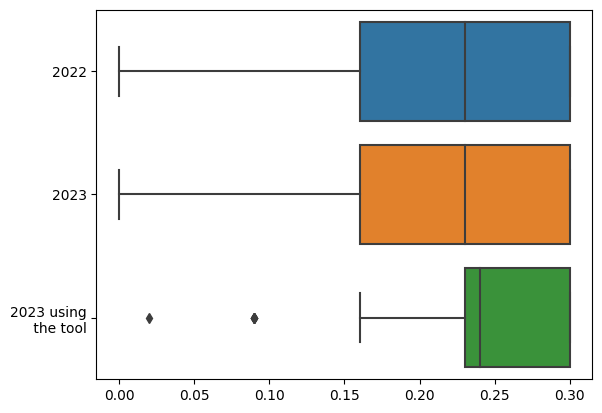

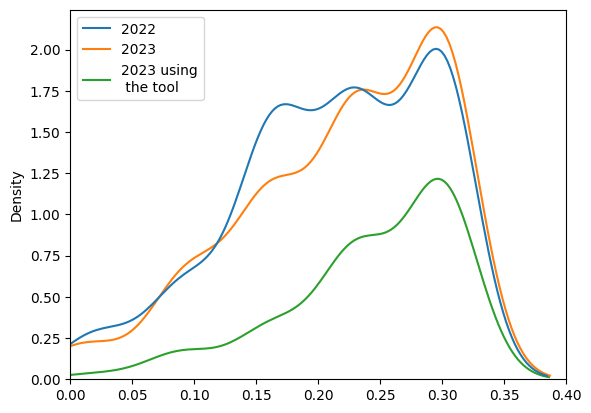

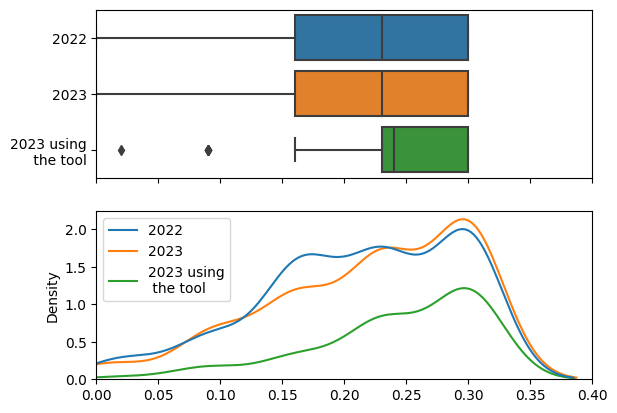

In [83]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns

marksDict={"2022":marks2022["mark"],"2023":marks2023["mark"],"2023 using\n the tool":marks2023UsingTheTool["mark"]}
#fig,ax=plt.subplots()
#plt.boxplot(notas, labels=["2020","2021","2022"])
#ax.yaxis.set_minor_locator(MultipleLocator(1))
sns.boxplot(data=pd.DataFrame(marksDict),orient="h")
plt.savefig('figs/Marks.png',bbox_inches='tight',dpi=300)
plt.show()


sns.kdeplot(marksDict)
plt.xlim(0, 0.4)
plt.savefig('figs/MarksDistributions.png',bbox_inches='tight',dpi=300)
plt.show()


f, (ax_box, ax_kde) = plt.subplots(2, sharex=True)
sns.boxplot(data=pd.DataFrame(marksDict),orient="h",ax=ax_box)
sns.kdeplot(marksDict,ax=ax_kde)
ax_box.set(xlabel='')
plt.xlim(0, 0.4)
plt.savefig('figs/DistributionsAndBoxplotCombined.png',bbox_inches='tight',dpi=300)
plt.show()



### Statistical tests on the differences  of  the distributions

#### Test assumptions: Normality 

In [76]:
from scipy.stats import shapiro

display(shapiro(marks2022["mark"]))
display(shapiro(marks2023["mark"]))
display(shapiro(marks2023UsingTheTool["mark"]))

ShapiroResult(statistic=0.8881406188011169, pvalue=2.119881492568254e-10)

ShapiroResult(statistic=0.8613497614860535, pvalue=1.5173032968940348e-11)

ShapiroResult(statistic=0.7901993989944458, pvalue=4.8573483013569785e-09)

Thus our results are not normal! However, appart from the recommended approach in this case, non-parametic tests (specifically we use Mann-Withney U tests) we will perform also parametric tests (in this case Welch's test).

In [81]:
from pingouin import ttest
from pingouin import mwu
from scipy.stats import wilcoxon


display("Differences beetween marks in 2022 and in 2023 in general (Mann-Withney U test)")
display(mwu(marks2022["mark"],marks2023["mark"]))
display("Differences beetween marks in 2020 and in 2022 (Mann-Withney U test)")
display(mwu(marks2022["mark"], marks2023UsingTheTool["mark"]))

differences2022to2023=ttest(marks2022["mark"],marks2023["mark"], correction = True)
differences2022to2023Using=ttest(marks2022["mark"], marks2023UsingTheTool["mark"], correction = True)
display("Differences beetween marks in 2022 and in 2023 (Welch's test) in general")
display(differences2022to2023)
display("Differences beetween marks in 2022 and in 2023 using the tool (Welch's test)")
display(differences2022to2023Using)


'Differences beetween marks in 2022 and in 2023 in general (Mann-Withney U test)'

,U-val,alternative,p-val,RBC,CLES
MWU,14975.0,two-sided,0.411083,0.049025,0.475487


'Differences beetween marks in 2020 and in 2022 (Mann-Withney U test)'

,U-val,alternative,p-val,RBC,CLES
MWU,5318.0,two-sided,0.003015,0.22681,0.386595


"Differences beetween marks in 2022 and in 2023 (Welch's test) in general"

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.714834,351.713863,two-sided,0.475186,"[-0.02, 0.01]",0.075925,0.15,0.109997


"Differences beetween marks in 2022 and in 2023 using the tool (Welch's test)"

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.163821,162.849771,two-sided,0.001858,"[-0.05, -0.01]",0.406316,15.506,0.841701


C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
